# Australian Dual Pol Data Cases

## Topics

- Overview
- Dual Pol returns of nonmeteorological echos
- Dual Pol returns of a supercell

![radar logo](https://s3-ap-southeast-2.amazonaws.com/public-web-data/ausradar-logo.png)

## Dual pol case for the 4/2/2018 from Melbourne radar

[radar loop](http://www.theweatherchaser.com/radar-loop/IDR023-melbourne/2018-02-04-09/2018-02-04-12)

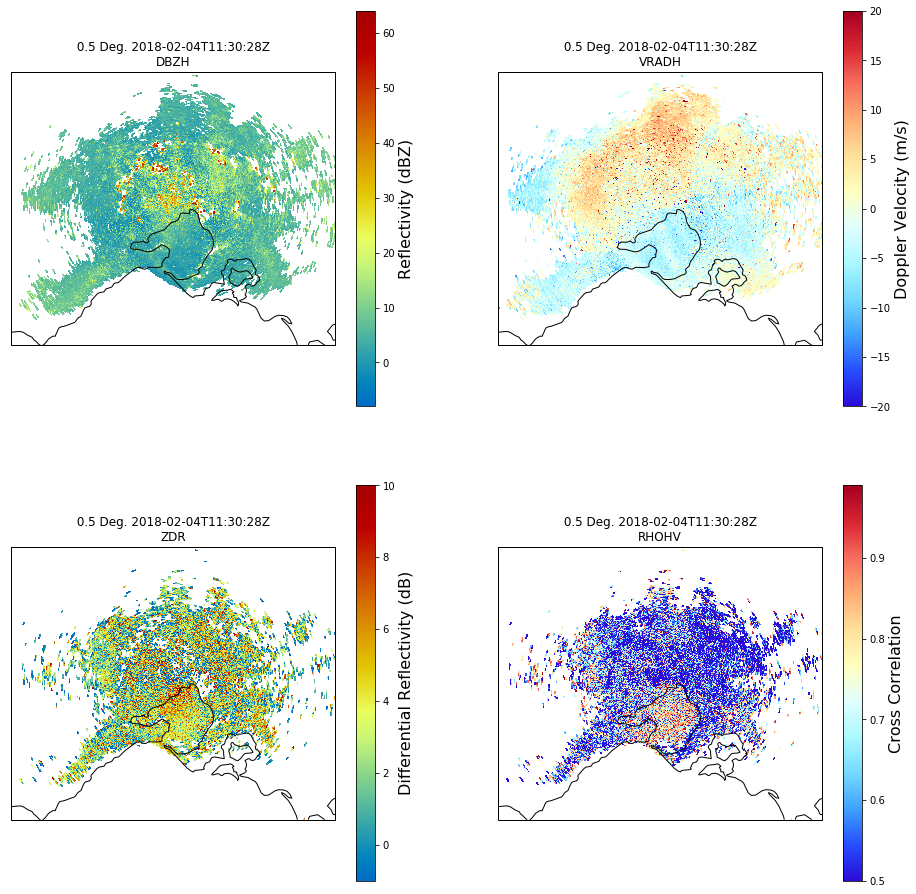

In [43]:
%matplotlib inline

import urllib
import pyart
from matplotlib import pyplot as plt
import cartopy.crs as ccrs # A toolkit for map projections

#dual pol data is currently not provided on the national dataset - but very soon it will be :)

#download a single radar volume from a static source
radar_volume_url = 'https://s3-ap-southeast-2.amazonaws.com/public-web-data/02_20180204_113028.pvol.h5'
radar_volume_fn  = '02_20180204_113028.pvol.h5'
urllib.request.urlretrieve(radar_volume_url, radar_volume_fn)

#load radar volume
my_radar = pyart.aux_io.read_odim_h5(radar_volume_fn, file_field_names=True)
#determine plot domains
radar_lat = my_radar.latitude['data'][0]
radar_lon = my_radar.longitude['data'][0]
min_lat   = radar_lat - 1.0
max_lat   = radar_lat + 1.0
min_lon   = radar_lon - 1.5
max_lon   = radar_lon + 1.5
# Set up the projection
projection = ccrs.Mercator(
                central_longitude=radar_lon,
                min_latitude=min_lat, max_latitude=max_lat)
#plotting
fig, axes = plt.subplots(2, 2, subplot_kw=dict(projection=projection), figsize=(16, 16))
display = pyart.graph.RadarMapDisplayCartopy(my_radar)

#Reflectivity
display.plot_ppi_map('DBZH', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-8, vmax=64, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                        resolution='10m', ax=axes[0][0])
cb = plt.colorbar(display.plots[0], ax=axes[0][0])
cb.set_label('Reflectivity (dBZ)', fontsize=16)

#Velocity
display.plot_ppi_map('VRADH', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-20, vmax=20, cmap=pyart.graph.cm.BuDRd12,
                        resolution='10m', ax=axes[0][1])
cb = plt.colorbar(display.plots[1], ax=axes[0][1])
cb.set_label('Doppler Velocity (m/s)', fontsize=16)

#Differential reflectivity
display.plot_ppi_map('ZDR', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-1, vmax=10, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                        resolution='10m', ax=axes[1][0])
cb = plt.colorbar(display.plots[2], ax=axes[1][0])
cb.set_label('Differential Reflectivity (dB)', fontsize=16)

#Cross Correlation
display.plot_ppi_map('RHOHV', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=0.5, vmax=0.99, cmap=pyart.graph.cm.BuDRd12,
                        resolution='10m', ax=axes[1][1])
cb = plt.colorbar(display.plots[3], ax=axes[1][1])
cb.set_label('Cross Correlation', fontsize=16)

plt.show()

## Discussion:

1. How does the dual pol moments shown above relate to identifying insects?
1. How would this differ from rain?

/home/meso/anaconda3/lib/python3.6/site-packages/cartopy/mpl/feature_artist.py:136: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


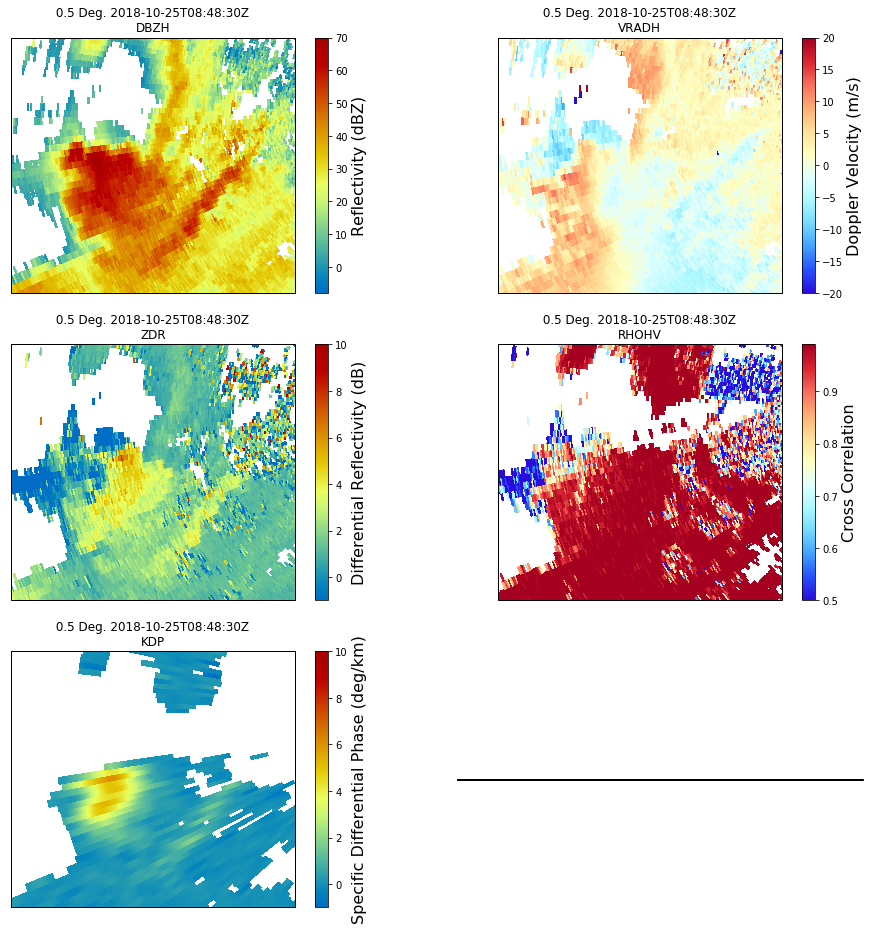

In [44]:
#download a single radar volume from a static source
radar_volume_url = 'https://s3-ap-southeast-2.amazonaws.com/public-web-data/66_20181025_084830.pvol.h5'
radar_volume_fn  = '66_20181025_084830.pvol.h5'
urllib.request.urlretrieve(radar_volume_url, radar_volume_fn)

#load radar volume
my_radar = pyart.aux_io.read_odim_h5(radar_volume_fn, file_field_names=True)
#determine plot domains
radar_lat = my_radar.latitude['data'][0]
radar_lon = my_radar.longitude['data'][0]
min_lat   = radar_lat - 0.3
max_lat   = radar_lat + 0.1
min_lon   = radar_lon - 0.75
max_lon   = radar_lon - 0.25
tilt      = 0

# Set up the projection
projection = ccrs.Mercator(
                central_longitude=radar_lon,
                min_latitude=min_lat, max_latitude=max_lat)
#plotting
fig, axes = plt.subplots(3, 2, subplot_kw=dict(projection=projection), figsize=(16, 16))
display = pyart.graph.RadarMapDisplayCartopy(my_radar)

#Reflectivity
display.plot_ppi_map('DBZH', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-8, vmax=70, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                        resolution='10m', ax=axes[0][0])
cb = plt.colorbar(display.plots[0], ax=axes[0][0])
cb.set_label('Reflectivity (dBZ)', fontsize=16)

#Velocity
display.plot_ppi_map('VRADH', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-20, vmax=20, cmap=pyart.graph.cm.BuDRd12,
                        resolution='10m', ax=axes[0][1])
cb = plt.colorbar(display.plots[1], ax=axes[0][1])
cb.set_label('Doppler Velocity (m/s)', fontsize=16)

#Differential Reflectivity
display.plot_ppi_map('ZDR', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-1, vmax=10, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                        resolution='10m', ax=axes[1][0])
cb = plt.colorbar(display.plots[2], ax=axes[1][0])
cb.set_label('Differential Reflectivity (dB)', fontsize=16)

#Cross Correlation
display.plot_ppi_map('RHOHV', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=0.5, vmax=0.99, cmap=pyart.graph.cm.BuDRd12,
                        resolution='10m', ax=axes[1][1])
cb = plt.colorbar(display.plots[3], ax=axes[1][1])
cb.set_label('Cross Correlation', fontsize=16)

#Specific differential phase (KDP)
display.plot_ppi_map('KDP', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-1, vmax=10, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                        resolution='10m', ax=axes[2][0])
cb = plt.colorbar(display.plots[4], ax=axes[2][0])
cb.set_label('Specific Differential Phase (deg/km)', fontsize=16)


## Discussion:

Explore the variability of ZDR, RHOHV and KDP within the high reflectivity region of the supercell


/home/meso/anaconda3/lib/python3.6/site-packages/cartopy/mpl/feature_artist.py:136: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


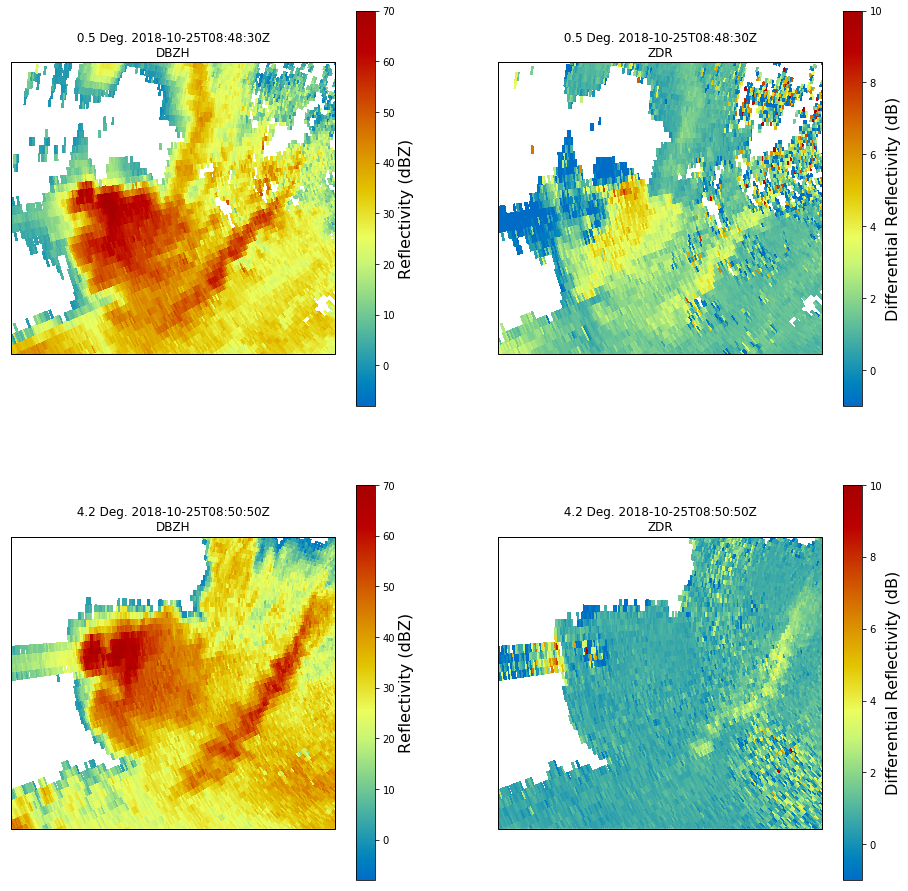

In [45]:
#plotting
fig, axes = plt.subplots(2, 2, subplot_kw=dict(projection=projection), figsize=(16, 16))
display = pyart.graph.RadarMapDisplayCartopy(my_radar)

#Differential Reflectivity
display.plot_ppi_map('DBZH', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-8, vmax=70, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                        resolution='10m', ax=axes[0][0])
cb = plt.colorbar(display.plots[0], ax=axes[0][0])
cb.set_label('Reflectivity (dBZ)', fontsize=16)

#Differential Reflectivity
display.plot_ppi_map('ZDR', 0,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-1, vmax=10, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                        resolution='10m', ax=axes[0][1])
cb = plt.colorbar(display.plots[1], ax=axes[0][1])
cb.set_label('Differential Reflectivity (dB)', fontsize=16)

#Differential Reflectivity
display.plot_ppi_map('DBZH', 6,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-8, vmax=70, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                        resolution='10m', ax=axes[1][0])
cb = plt.colorbar(display.plots[2], ax=axes[1][0])
cb.set_label('Reflectivity (dBZ)', fontsize=16)

#Differential Reflectivity
display.plot_ppi_map('ZDR', 6,
                        projection=projection, colorbar_flag=False,
                        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                        vmin=-1, vmax=10, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                        resolution='10m', ax=axes[1][1])
cb = plt.colorbar(display.plots[3], ax=axes[1][1])
cb.set_label('Differential Reflectivity (dB)', fontsize=16)

plt.show()